In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive/')

Mounted at /content/drive/


**Importing the necessary Libraries**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Reading the training and test Datasets**

In [4]:
train_data=pd.read_excel('/content/drive/MyDrive/Data_Train.xlsx')
test_data=pd.read_excel('/content/drive/MyDrive/Test_set.xlsx')

In [5]:
# Printing the shape of train_data and test_data
print(train_data.shape)
print(test_data.shape)

(10683, 11)
(2671, 10)


In [6]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [7]:
train_data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [9]:
# Checking for any null values
train_data.isnull().values.any()

True

In [10]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [11]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [12]:
test_data.isnull().values.any()

False

In [13]:
# Dropping the null values
train_data.dropna(inplace=True)

In [14]:
train_data.isnull().values.any()

False

In [15]:
# Checking if there are any Duplicate values
train_data[train_data.duplicated()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303
...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 28 Jun,13h 30m,2 stops,No info,12819
10616,Jet Airways,1/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 02 Jun,26h 55m,2 stops,No info,13014
10634,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 07 Jun,26h 55m,2 stops,In-flight meal not included,11733
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150


In [16]:
# Drop duplicates value
train_data.drop_duplicates(keep='first',inplace=True)

In [17]:
train_data.shape

(10462, 11)

In [18]:
train_data["Additional_Info"].value_counts()

No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
2 Long layover                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

In [19]:
# Converting 'No Info' to 'No info' because they both are same
train_data["Additional_Info"] = train_data["Additional_Info"].replace({'No Info': 'No info'})

In [20]:
train_data["Additional_Info"].value_counts()

No info                         8185
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
Red-eye flight                     1
2 Long layover                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

**Performing Feature Engineering and Exploratory Data Analysis**

In [21]:
# Duration convert hours to  min.
train_data['Duration']=  train_data['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)
test_data['Duration']=  test_data['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [22]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1 stop,No info,13302


In [23]:
# Date_of_Journey for train_data
train_data["Journey_day"] = train_data['Date_of_Journey'].str.split('/').str[0].astype(int)
train_data["Journey_month"] = train_data['Date_of_Journey'].str.split('/').str[1].astype(int)
train_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
train_data["Dep_hour"] = pd.to_datetime(train_data["Dep_Time"]).dt.hour
train_data["Dep_min"] = pd.to_datetime(train_data["Dep_Time"]).dt.minute
train_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
train_data["Arrival_hour"] = pd.to_datetime(train_data.Arrival_Time).dt.hour
train_data["Arrival_min"] = pd.to_datetime(train_data.Arrival_Time).dt.minute
train_data.drop(["Arrival_Time"], axis = 1, inplace = True)

In [24]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,1,3,16,50,21,35


In [25]:
# Date_of_Journey for test_data
test_data["Journey_day"] = test_data['Date_of_Journey'].str.split('/').str[0].astype(int)
test_data["Journey_month"] = test_data['Date_of_Journey'].str.split('/').str[1].astype(int)
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)


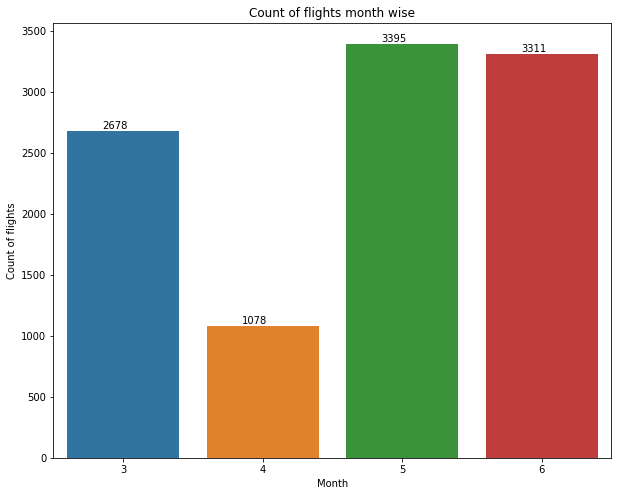

In [26]:
plt.figure(figsize = (10, 8))
plt.title('Count of flights month wise')
ax=sns.countplot(x = 'Journey_month', data = train_data)
plt.xlabel('Month')
plt.ylabel('Count of flights')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',color= 'black')

*5th month i.e month of May experiences the most number of flights*

In [27]:
train_data['Total_Stops'].replace(['1 stop', 'non-stop', '2 stops', '3 stops', '4 stops'], [1, 0, 2, 3, 4], inplace=True)
test_data['Total_Stops'].replace(['1 stop', 'non-stop', '2 stops', '3 stops', '4 stops'], [1, 0, 2, 3, 4], inplace=True)

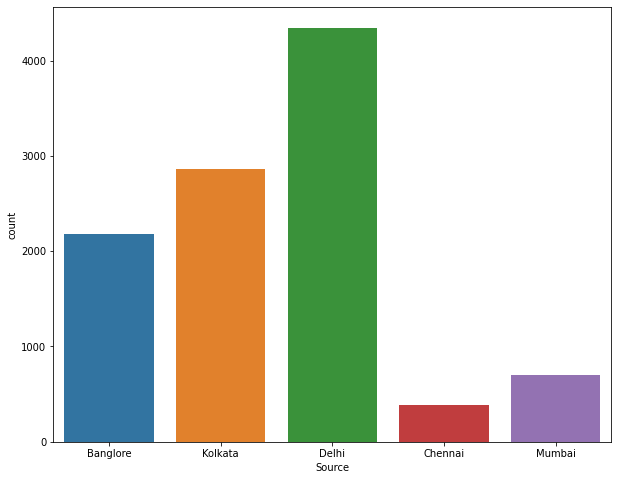

In [28]:
plt.figure(figsize = (10, 8))
sns.countplot(x='Source',data=train_data)

*From the above figure we can clearly see that Delhi is the source of most of the flights*

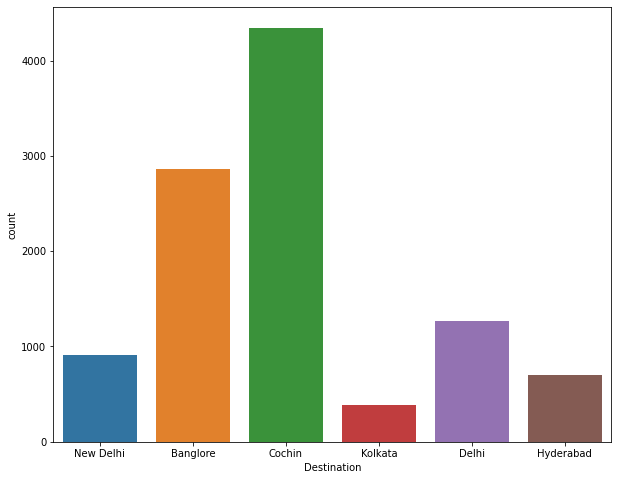

In [29]:
plt.figure(figsize = (10, 8))
sns.countplot(x='Destination',data=train_data)

*Similarly we can see that Cochin is the destination of most of the flights*

In [30]:
train_data["Airline"].value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

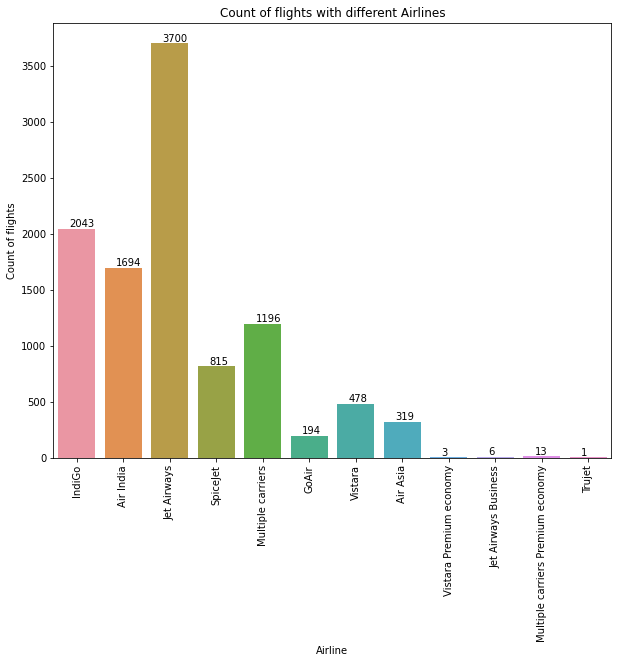

In [31]:
plt.figure(figsize = (10, 8))
plt.title('Count of flights with different Airlines')
ax=sns.countplot(x = 'Airline', data =train_data)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',color= 'black')

*There are more number of flights of Jet Airways*

*Jet Airways Business, Vistara Premium economy, Trujet have actually almost negligible flights*

In [32]:
train_data["Total_Stops"].value_counts()

1    5625
0    3475
2    1318
3      43
4       1
Name: Total_Stops, dtype: int64

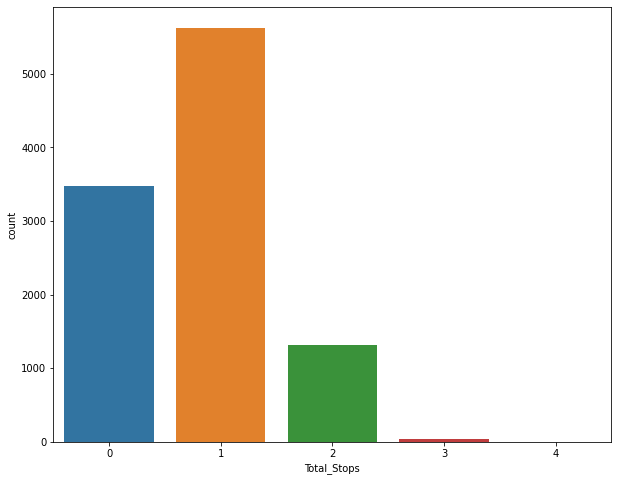

In [33]:
plt.figure(figsize = (10, 8))
sns.countplot(x='Total_Stops',data=train_data)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text major ticklabel objects>)

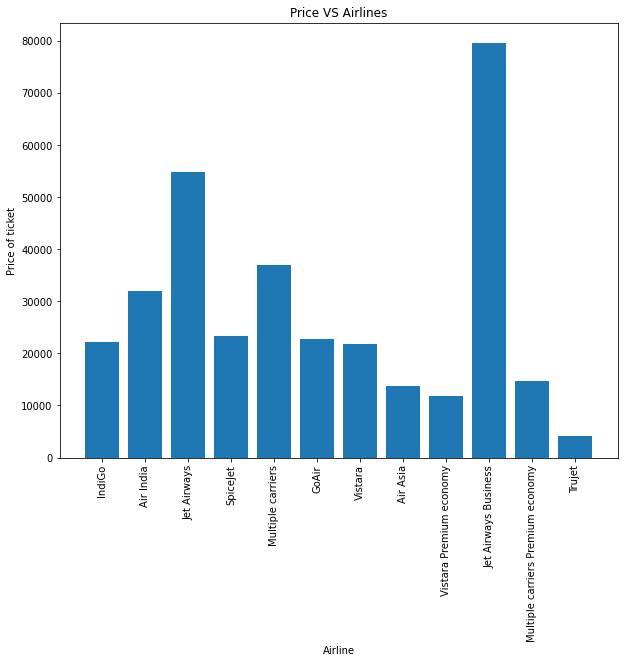

In [35]:
plt.figure(figsize = (10, 8))
plt.title('Price VS Airlines')
plt.bar(train_data['Airline'], train_data['Price'])
plt.xticks(rotation = 90)
plt.xlabel('Airline')
plt.ylabel('Price of ticket')
plt.xticks(rotation = 90)

*The ticket rate for Jet Airways Business airline is highest*

In [36]:
train_data["Airline"].replace({'Multiple carriers Premium economy':'Other', 
                                                        'Jet Airways Business':'Other',
                                                        'Vistara Premium economy':'Other',
                                                        'Trujet':'Other'},inplace=True)

test_data["Airline"].replace({'Multiple carriers Premium economy':'Other', 
                                                        'Jet Airways Business':'Other',
                                                        'Vistara Premium economy':'Other',
                                                        'Trujet':'Other'},inplace=True)

Text(0, 0.5, 'Price of ticket')

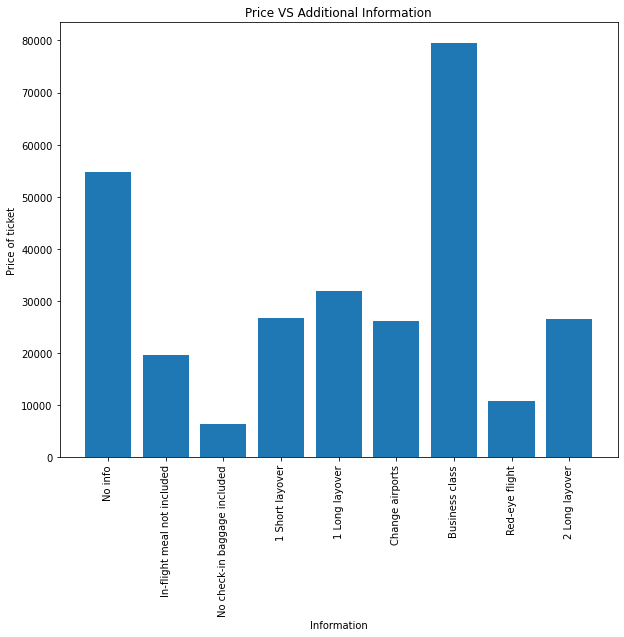

In [37]:
plt.figure(figsize = (10, 8))
plt.title('Price VS Additional Information')
plt.bar(train_data['Additional_Info'], train_data['Price'],data=train_data)
plt.xticks(rotation = 90)
plt.xlabel('Information')
plt.ylabel('Price of ticket')

*From above scatter plot it is clear that the ticket prices for Business class is higher which is quite obivious*

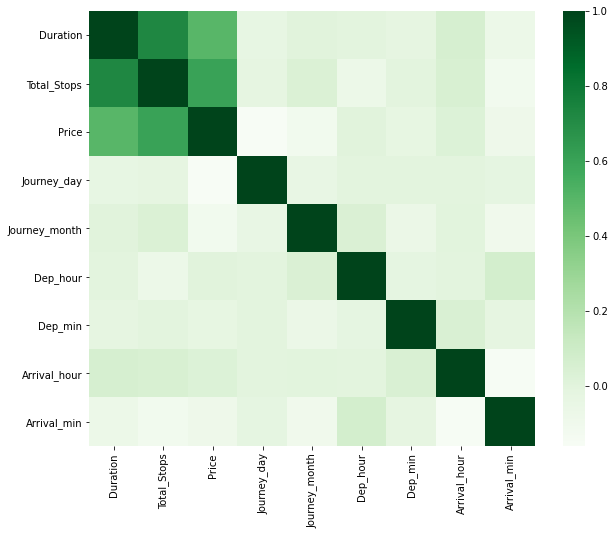

In [38]:
plt.figure(figsize = (10 , 8))
sns.heatmap(train_data.corr() , annot = False , cmap = "Greens")

*From the above heatmap it is clear thar Duration, price, Total_Stops are highly correlated*

In [39]:
train_data["Additional_Info"].value_counts()

No info                         8185
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
Red-eye flight                     1
2 Long layover                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

In [40]:
# Additional_Info
train_data["Additional_Info"].replace({'Change airports':'Other', 
                                                        'Business class':'Other',
                                                        '1 Short layover':'Other',
                                                        'Red-eye flight':'Other',
                                                        '2 Long layover':'Other',},inplace=True)
test_data["Additional_Info"].replace({'Change airports':'Other', 
                                                        'Business class':'Other',
                                                        '1 Short layover':'Other',
                                                        'Red-eye flight':'Other',
                                                        '2 Long layover':'Other',},inplace=True)

In [41]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,0,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1,No info,13302,1,3,16,50,21,35


**Converting categorical data into numerical data**

In [42]:
data = train_data.drop(["Price"], axis=1)

In [43]:
train_categorical_data = data.select_dtypes(exclude=['int64', 'float','int32'])
train_numerical_data = data.select_dtypes(include=['int64', 'float','int32'])

test_categorical_data = test_data.select_dtypes(exclude=['int64', 'float','int32','int32'])
test_numerical_data  = test_data.select_dtypes(include=['int64', 'float','int32'])

In [44]:
train_categorical_data.head()

,Airline,Source,Destination,Route,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,No info


In [45]:
#Label encode and hot encode categorical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_categorical_data = train_categorical_data.apply(LabelEncoder().fit_transform)
test_categorical_data = test_categorical_data.apply(LabelEncoder().fit_transform)

In [46]:
train_categorical_data.head()

,Airline,Source,Destination,Route,Additional_Info
0,3,0,5,18,3
1,1,3,0,84,3
2,4,2,1,118,3
3,3,3,0,91,3
4,3,0,5,29,3


**Concatenate both catagorical and numerical data**

In [47]:
X = pd.concat([train_categorical_data, train_numerical_data], axis=1)
y=train_data['Price']
test_set = pd.concat([test_categorical_data, test_numerical_data], axis=1)

In [48]:
X.head()

,Airline,Source,Destination,Route,Additional_Info,Duration,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,3,0,5,18,3,170,0,24,3,22,20,1,10
1,1,3,0,84,3,445,2,1,5,5,50,13,15
2,4,2,1,118,3,1140,2,9,6,9,25,4,25
3,3,3,0,91,3,325,1,12,5,18,5,23,30
4,3,0,5,29,3,285,1,1,3,16,50,21,35


In [49]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

**Building the Model**

In [50]:
#Splitting the Dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [52]:
#Using Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor(n_jobs=-1)
reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [53]:
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

In [54]:
from sklearn.metrics import r2_score
print("R-squared of train data: ", r2_score(y_train.values, y_train_pred))
print("R-squared of test data: ", r2_score(y_test, y_test_pred))

R-squared of train data:  0.9782073087520093
R-squared of test data:  0.8965855713443431


*We obtain an accuracy of 89.7% on the testing data using the Random Forest Regressor Model*